# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | yemel'yanovo
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | hadibu
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | dombarovskiy
Processing Record 10 of Set 1 | khoyniki
Processing Record 11 of Set 1 | behshahr
Processing Record 12 of Set 1 | el calafate
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | malabrigo
Processing Record 15 of Set 1 | plouzane
Processing Record 16 of Set 1 | vorkuta
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | broken hill
Processing Record 20 of Set 1 | narvik
Processing Record 21 of Set 1 | taoudenni
Processing Record 22 of Set 1 | taiohae
City not fou

In [18]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,9.76,78,21,0.99,CA,1691647656
1,vila velha,-20.3297,-40.2925,22.97,92,75,3.60,BR,1691647657
2,stanley,54.8680,-1.6985,16.82,92,75,1.03,GB,1691647515
3,yemel'yanovo,56.1681,92.6767,24.49,50,40,2.00,RU,1691647658
4,port alfred,-33.5906,26.8910,15.10,89,0,1.34,ZA,1691647658


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/Diana/Desktop/WeatherPy_/python-api-challenge/WeatherPy/cities.csv", index_label="City_ID")


In [21]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/Diana/Desktop/WeatherPy_/python-api-challenge/WeatherPy/cities.csv")
# Display sample data
city_data_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,thompson,55.7435,-97.8558,9.76,78,21,0.99,CA,1691647656
1,1,vila velha,-20.3297,-40.2925,22.97,92,75,3.60,BR,1691647657
2,2,stanley,54.8680,-1.6985,16.82,92,75,1.03,GB,1691647515
3,3,yemel'yanovo,56.1681,92.6767,24.49,50,40,2.00,RU,1691647658
4,4,port alfred,-33.5906,26.8910,15.10,89,0,1.34,ZA,1691647658


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [22]:
print(city_data_df.columns)


Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


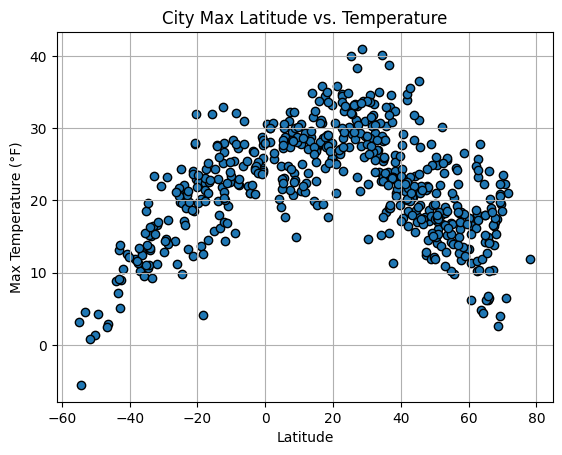

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

plt.title('City Max Latitude vs. Temperature')
plt.grid(True)


# Show plot
plt.show()




#### Latitude Vs. Humidity

In [26]:
print(city_data_df.columns)

Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


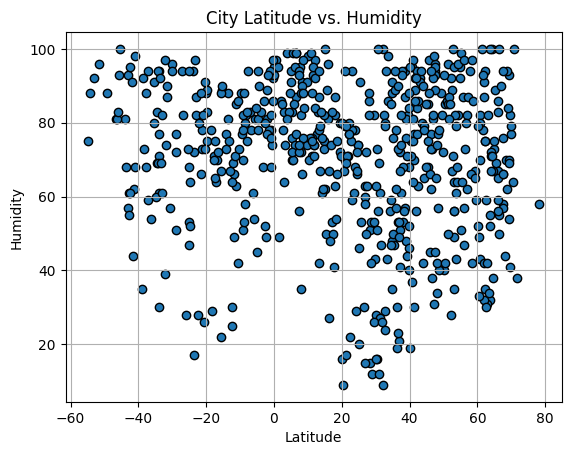

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.title('City Latitude vs. Humidity')
plt.grid(True)


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [27]:
print(city_data_df.columns)

Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


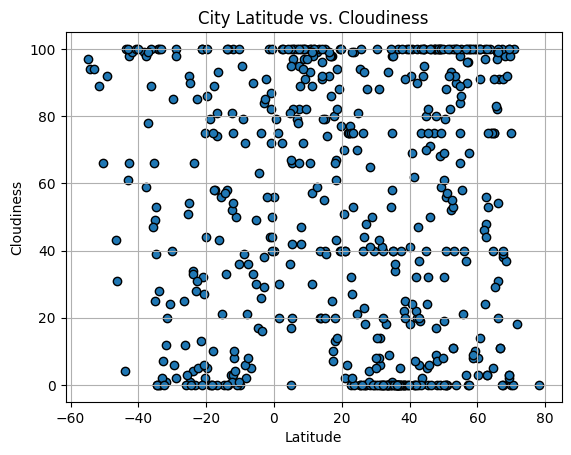

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title('City Latitude vs. Cloudiness')
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

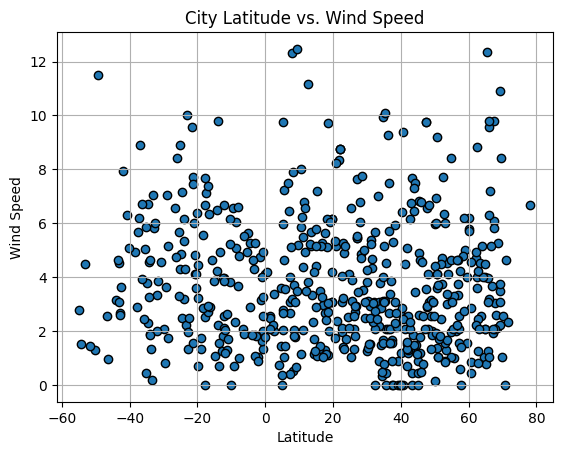

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
print(city_data)


[{'City': 'thompson', 'Lat': 55.7435, 'Lng': -97.8558, 'Max Temp': 9.76, 'Humidity': 78, 'Cloudiness': 21, 'Wind Speed': 0.99, 'Country': 'CA', 'Date': 1691647656}, {'City': 'vila velha', 'Lat': -20.3297, 'Lng': -40.2925, 'Max Temp': 22.97, 'Humidity': 92, 'Cloudiness': 75, 'Wind Speed': 3.6, 'Country': 'BR', 'Date': 1691647657}, {'City': 'stanley', 'Lat': 54.868, 'Lng': -1.6985, 'Max Temp': 16.82, 'Humidity': 92, 'Cloudiness': 75, 'Wind Speed': 1.03, 'Country': 'GB', 'Date': 1691647515}, {'City': "yemel'yanovo", 'Lat': 56.1681, 'Lng': 92.6767, 'Max Temp': 24.49, 'Humidity': 50, 'Cloudiness': 40, 'Wind Speed': 2, 'Country': 'RU', 'Date': 1691647658}, {'City': 'port alfred', 'Lat': -33.5906, 'Lng': 26.891, 'Max Temp': 15.1, 'Humidity': 89, 'Cloudiness': 0, 'Wind Speed': 1.34, 'Country': 'ZA', 'Date': 1691647658}, {'City': 'hadibu', 'Lat': 12.65, 'Lng': 54.0333, 'Max Temp': 27.13, 'Humidity': 73, 'Cloudiness': 99, 'Wind Speed': 11.18, 'Country': 'YE', 'Date': 1691647659}, {'City': 'touro

In [40]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_reg(x_data, y_data):

    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()   

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()  

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


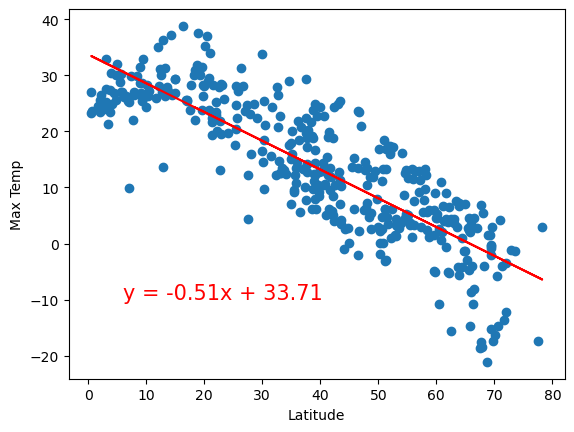

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


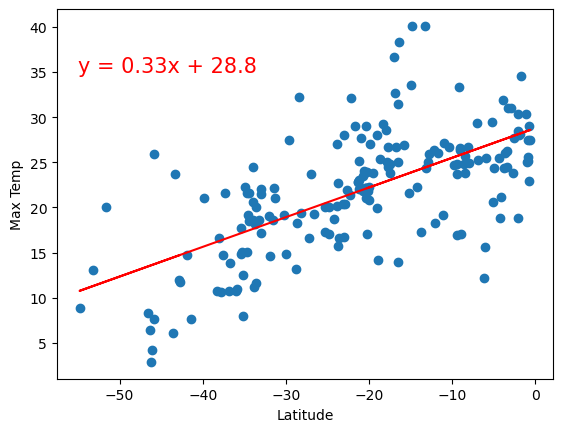

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


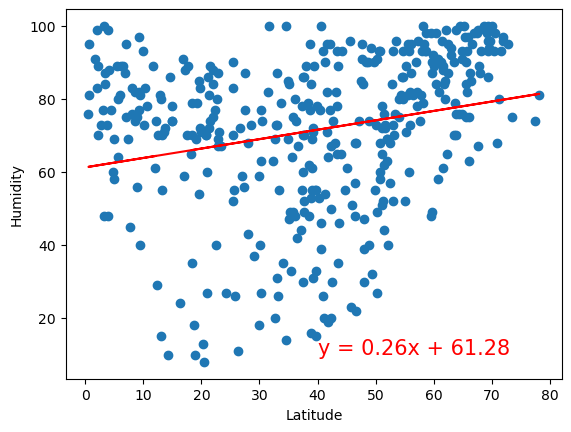

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


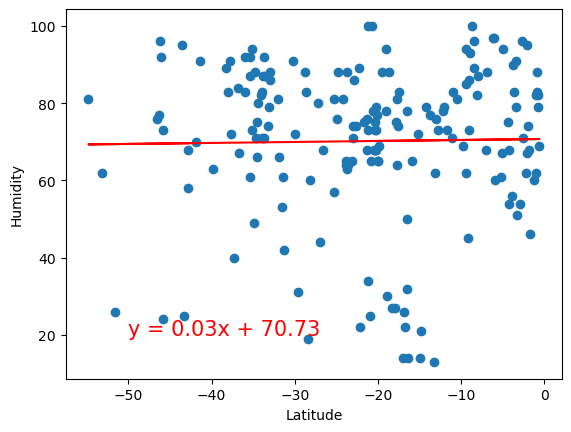

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


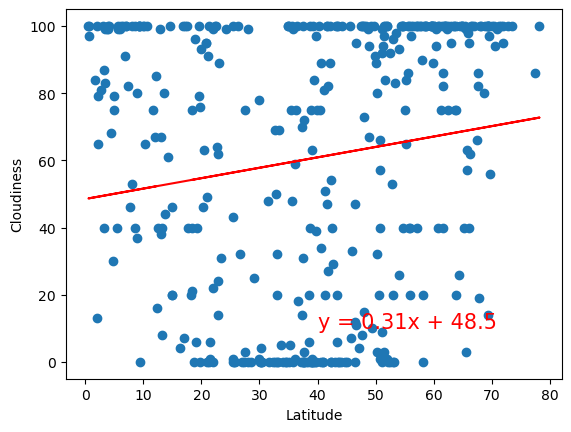

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


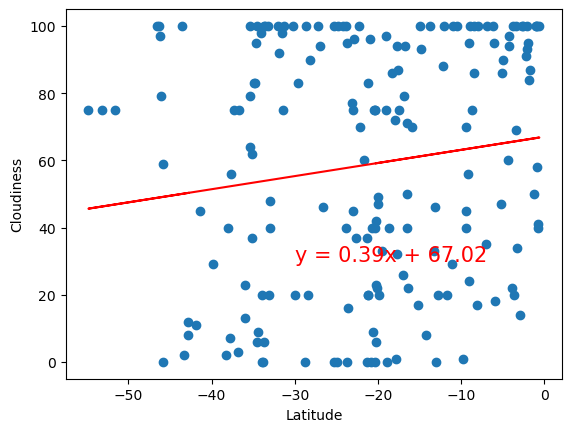

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


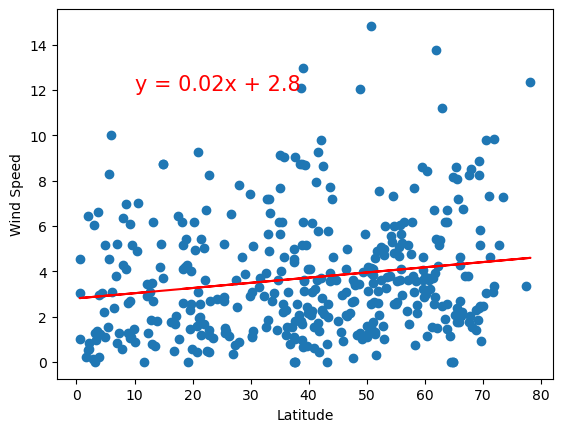

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


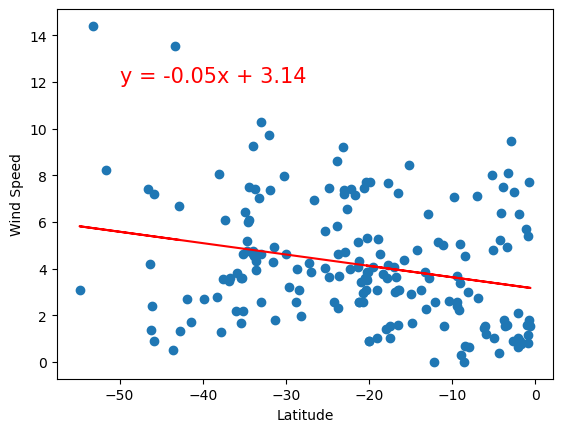

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE